### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
#import tensorflow as tf

In [2]:
key='b7229f382db696b1193092be9f3962e64bca5125'

In [3]:
df=pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.shape

(1258, 12)

In [5]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2016-08-01 00:00:00+00:00  106.05  106.15  104.41  104.41  38167871   
       2016-08-02 00:00:00+00:00  104.48  106.07  104.00  106.05  33816556   
       2016-08-03 00:00:00+00:00  105.79  105.84  104.77  104.81  30202641   
       2016-08-04 00:00:00+00:00  105.87  106.00  105.28  105.58  27408650   
       2016-08-05 00:00:00+00:00  107.48  107.65  106.18  106.27  40553402   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2016-08-01 00:00:00+00:00  24.764101  24.787452  24.381139  24.381139   
       2016-08-02 00:00:00+00:00  24.397485  24.768771  24.285399  24.764101   
       2016-08-03 00:00:00+00:00  24.703388  24.715063  24.465204  24.474544   
       2016-08-04 00:00:00+00:00  24.855171  24.885692  24.716657  24.787088   
       2016-08-05 00:00:00+00:00  25.233152  25.273063  24.927950  24.949080   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2016-08-01 00:00:00+00:00  152671484     0.00          1.0  
       2016-08-02 00:00:00+00:00  135266224     0.00          1.0  
       2016-08-03 00:00:00+00:00  120810564     0.00          1.0  
       2016-08-04 00:00:00+00:00  109634600     0.57          1.0  
       2016-08-05 00:00:00+00:00  162213608     0.00          1.0

In [6]:
df.tail()

close      high     low     open  \
symbol date                                                           
AAPL   2021-07-23 00:00:00+00:00  148.56  148.7177  146.92  147.550   
       2021-07-26 00:00:00+00:00  148.99  149.8300  147.70  148.270   
       2021-07-27 00:00:00+00:00  146.77  149.2100  145.55  149.120   
       2021-07-28 00:00:00+00:00  144.98  146.9700  142.54  144.810   
       2021-07-29 00:00:00+00:00  145.64  146.5500  144.58  144.685   

                                     volume  adjClose   adjHigh  adjLow  \
symbol date                                                               
AAPL   2021-07-23 00:00:00+00:00   71447416    148.56  148.7177  146.92   
       2021-07-26 00:00:00+00:00   72434089    148.99  149.8300  147.70   
       2021-07-27 00:00:00+00:00  104818578    146.77  149.2100  145.55   
       2021-07-28 00:00:00+00:00  118931191    144.98  146.9700  142.54   
       2021-07-29 00:00:00+00:00   54323047    145.64  146.5500  144.58   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
AAPL   2021-07-23 00:00:00+00:00  147.550   71447416      0.0          1.0  
       2021-07-26 00:00:00+00:00  148.270   72434089      0.0          1.0  
       2021-07-27 00:00:00+00:00  149.120  104818578      0.0          1.0  
       2021-07-28 00:00:00+00:00  144.810  118931191      0.0          1.0  
       2021-07-29 00:00:00+00:00  144.685   54323047      0.0          1.0

In [7]:
df1=df.reset_index()['close']

In [8]:
df1

0       106.05
1       104.48
2       105.79
3       105.87
4       107.48
         ...  
1253    148.56
1254    148.99
1255    146.77
1256    144.98
1257    145.64
Name: close, Length: 1258, dtype: float64

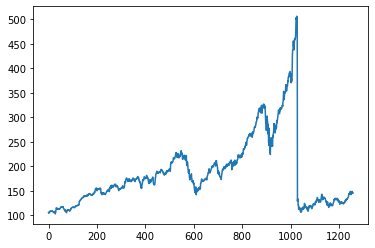

In [9]:
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
df1

0       106.05
1       104.48
2       105.79
3       105.87
4       107.48
         ...  
1253    148.56
1254    148.99
1255    146.77
1256    144.98
1257    145.64
Name: close, Length: 1258, dtype: float64

In [11]:

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.00724638]
 [0.00335021]
 [0.00660115]
 ...
 [0.10829859]
 [0.10385646]
 [0.10549434]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 441)

In [15]:
train_data

array([[0.00724638],
       [0.00335021],
       [0.00660115],
       [0.00679968],
       [0.01079512],
       [0.01300377],
       [0.01409569],
       [0.01208557],
       [0.01191185],
       [0.01253226],
       [0.01575839],
       [0.01551022],
       [0.01511316],
       [0.01476573],
       [0.01546059],
       [0.0133512 ],
       [0.01419496],
       [0.01216002],
       [0.01101846],
       [0.00945503],
       [0.00915724],
       [0.0071223 ],
       [0.00737046],
       [0.00893389],
       [0.01141553],
       [0.01134108],
       [0.01297896],
       [0.00593111],
       [0.        ],
       [0.00573258],
       [0.01196149],
       [0.02144133],
       [0.03087155],
       [0.02925849],
       [0.0259331 ],
       [0.02590828],
       [0.02585865],
       [0.028514  ],
       [0.02377407],
       [0.02419595],
       [0.02471709],
       [0.0268513 ],
       [0.0224588 ],
       [0.02461783],
       [0.02330256],
       [0.02449375],
       [0.02461783],
       [0.026

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model


In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 318ms/step - loss: 0.0091 - val_loss: 0.0413
Epoch 2/100
12/12 [==============================] - 2s 165ms/step - loss: 0.0019 - val_loss: 0.0273
Epoch 3/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0011 - val_loss: 0.0214
Epoch 4/100
12/12 [==============================] - 2s 164ms/step - loss: 5.5923e-04 - val_loss: 0.0223
Epoch 5/100
12/12 [==============================] - 2s 163ms/step - loss: 5.1093e-04 - val_loss: 0.0211
Epoch 6/100
12/12 [==============================] - 2s 156ms/step - loss: 4.2845e-04 - val_loss: 0.0190
Epoch 7/100
12/12 [==============================] - 2s 155ms/step - loss: 4.1960e-04 - val_loss: 0.0187
Epoch 8/100
12/12 [==============================] - 2s 156ms/step - loss: 3.8313e-04 - val_loss: 0.0193
Epoch 9/100
12/12 [==============================] - 2s 157ms/step - loss: 3.8022e-04 - val_loss: 0.0181
Epoch 10/100
12/12 [==============================] - 2s 157ms/step

12/12 [==============================] - 2s 161ms/step - loss: 1.6029e-04 - val_loss: 0.0114
Epoch 79/100
12/12 [==============================] - 2s 160ms/step - loss: 1.7405e-04 - val_loss: 0.0093
Epoch 80/100
12/12 [==============================] - 2s 172ms/step - loss: 1.3843e-04 - val_loss: 0.0107
Epoch 81/100
12/12 [==============================] - 2s 172ms/step - loss: 1.4075e-04 - val_loss: 0.0065
Epoch 82/100
12/12 [==============================] - 2s 167ms/step - loss: 1.4534e-04 - val_loss: 0.0090
Epoch 83/100
12/12 [==============================] - 2s 160ms/step - loss: 1.3486e-04 - val_loss: 0.0072
Epoch 84/100
12/12 [==============================] - 2s 159ms/step - loss: 1.3447e-04 - val_loss: 0.0074
Epoch 85/100
12/12 [==============================] - 2s 160ms/step - loss: 1.4078e-04 - val_loss: 0.0073
Epoch 86/100
12/12 [==============================] - 2s 161ms/step - loss: 1.3611e-04 - val_loss: 0.0074
Epoch 87/100
12/12 [==============================] - 2s 15

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics

math.sqrt(mean_squared_error(y_train,train_predict))

177.42504602141946

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

215.07691513254053

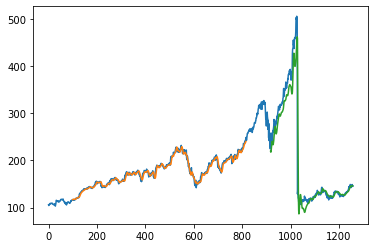

In [31]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)

441

In [33]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.04455777248362125,
 0.04181556482032961,
 0.04672920389120511,
 0.04442128250943028,
 0.051766924756799726,
 0.05568790946992258,
 0.05367778439547355,
 0.04318046456223945,
 0.04184038117927341,
 0.05027794322017076,
 0.048168552709946466,
 0.0420885447687116,
 0.043329362715902375,
 0.044867976970418944,
 0.045314671431407605,
 0.04161703394877908,
 0.047200714711137626,
 0.04931010522136198,
 0.05650684931506855,
 0.05727615644232681,
 0.06147012110383171,
 0.06757494540401038,
 0.0741140559857058,
 0.06975878499106619,
 0.07767520349414342,
 0.07171927734762762,
 0.07784891800675009,
 0.07700516180266037,
 0.07869267421083981,
 0.07439944411355975,
 0.07536728211236854,
 0.07149593011713323,
 0.07740222354576137,
 0.07839487790351402,
 0.0775759380583681,
 0.07556581298391907,
 0.07531764939448088,
 0.07030474488783012,
 0.0729849116537622,
 0.06134603930911259,
 0.061966448282707975,
 0.06603633114949381,
 0.06720270001985312,
 0.05886440341473104,
 0.056531665674012355,
 0.048

In [36]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10776499]
101
1 day input [0.04181556 0.0467292  0.04442128 0.05176692 0.05568791 0.05367778
 0.04318046 0.04184038 0.05027794 0.04816855 0.04208854 0.04332936
 0.04486798 0.04531467 0.04161703 0.04720071 0.04931011 0.05650685
 0.05727616 0.06147012 0.06757495 0.07411406 0.06975878 0.0776752
 0.07171928 0.07784892 0.07700516 0.07869267 0.07439944 0.07536728
 0.07149593 0.07740222 0.07839488 0.07757594 0.07556581 0.07531765
 0.07030474 0.07298491 0.06134604 0.06196645 0.06603633 0.0672027
 0.0588644  0.05653167 0.04873933 0.05419893 0.06035338 0.05742505
 0.05390113 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849
 0.0588644  0.05496824 0.05330554 0.0524866  0.05442228 0.05065019
 0.05648203 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522
 0.06787274 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932
 0.07655847 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031
 0.08395374 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842
 0.10417907 0.10266528 0.10549434 0

8 day output [[0.10820726]]
9 day input [0.05027794 0.04816855 0.04208854 0.04332936 0.04486798 0.04531467
 0.04161703 0.04720071 0.04931011 0.05650685 0.05727616 0.06147012
 0.06757495 0.07411406 0.06975878 0.0776752  0.07171928 0.07784892
 0.07700516 0.07869267 0.07439944 0.07536728 0.07149593 0.07740222
 0.07839488 0.07757594 0.07556581 0.07531765 0.07030474 0.07298491
 0.06134604 0.06196645 0.06603633 0.0672027  0.0588644  0.05653167
 0.04873933 0.05419893 0.06035338 0.05742505 0.05390113 0.05350407
 0.06000596 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824
 0.05330554 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685
 0.05859142 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817
 0.0670538  0.07112368 0.06782311 0.07238932 0.07655847 0.07586361
 0.07514393 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305
 0.09139865 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528
 0.10549434 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998
 0.10489875 0.10837304

19 day output [[0.11061817]]
20 day input [0.06147012 0.06757495 0.07411406 0.06975878 0.0776752  0.07171928
 0.07784892 0.07700516 0.07869267 0.07439944 0.07536728 0.07149593
 0.07740222 0.07839488 0.07757594 0.07556581 0.07531765 0.07030474
 0.07298491 0.06134604 0.06196645 0.06603633 0.0672027  0.0588644
 0.05653167 0.04873933 0.05419893 0.06035338 0.05742505 0.05390113
 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849 0.0588644
 0.05496824 0.05330554 0.0524866  0.05442228 0.05065019 0.05648203
 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522 0.06787274
 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932 0.07655847
 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031 0.08395374
 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842 0.10417907
 0.10266528 0.10549434 0.11420488 0.11254219 0.10735557 0.09757792
 0.10675998 0.10489875 0.10837304 0.11274072 0.11380782 0.10829859
 0.10385646 0.10549434 0.10776499 0.10757725 0.10742496 0.10737423
 0.10742559 0.10755686

27 day output [[0.11179147]]
28 day input [0.07869267 0.07439944 0.07536728 0.07149593 0.07740222 0.07839488
 0.07757594 0.07556581 0.07531765 0.07030474 0.07298491 0.06134604
 0.06196645 0.06603633 0.0672027  0.0588644  0.05653167 0.04873933
 0.05419893 0.06035338 0.05742505 0.05390113 0.05350407 0.06000596
 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824 0.05330554
 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685 0.05859142
 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538
 0.07112368 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393
 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865
 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434
 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875
 0.10837304 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434
 0.10776499 0.10757725 0.10742496 0.10737423 0.10742559 0.10755686
 0.10774335 0.10796498 0.10820726 0.10845989 0.10871544 0.10896838
 0.10921457 0.1094510

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
len(df1)

1258

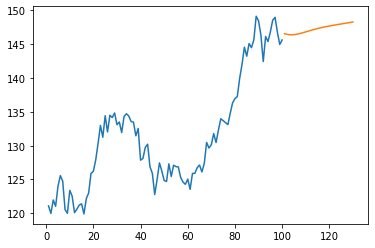

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

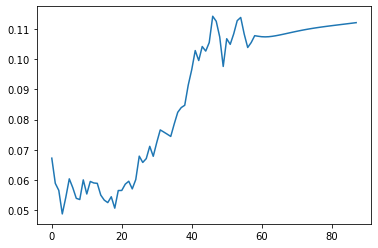

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [41]:
df3=scaler.inverse_transform(df3).tolist()

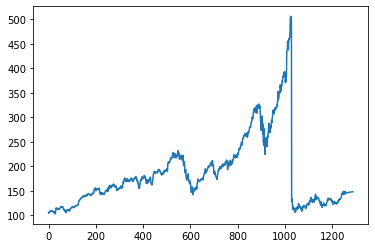

In [42]:
plt.plot(df3)

In [43]:
scaler.inverse_transform(lst_output)

array([[146.55498002],
       [146.47932842],
       [146.4179617 ],
       [146.39751913],
       [146.41821389],
       [146.47111116],
       [146.54625838],
       [146.63556738],
       [146.73319572],
       [146.83499723],
       [146.93797264],
       [147.03989724],
       [147.13910478],
       [147.23440934],
       [147.32503034],
       [147.41058348],
       [147.49099671],
       [147.56651021],
       [147.6375503 ],
       [147.70469943],
       [147.7686211 ],
       [147.83000283],
       [147.88952015],
       [147.94777651],
       [148.00530631],
       [148.0625599 ],
       [148.11987955],
       [148.17749041],
       [148.23556963],
       [148.29416825]])